✅ Columns found: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']


20:37:09 - cmdstanpy - INFO - Chain [1] start processing
20:37:10 - cmdstanpy - INFO - Chain [1] done processing


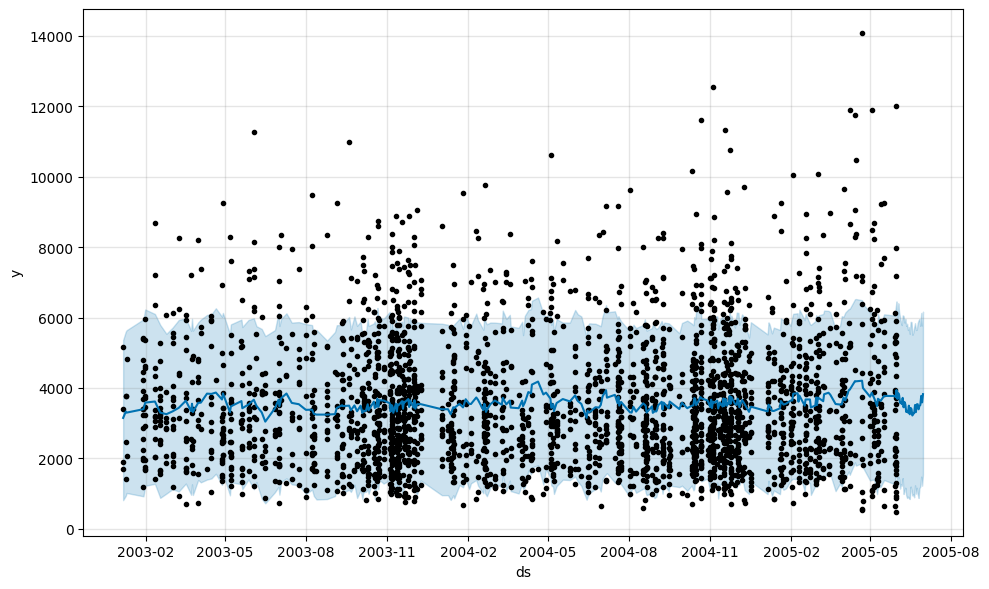

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


df = pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')


df.columns = df.columns.str.strip()


print("✅ Columns found:", df.columns.tolist())


df.rename(columns={
    'ORDERDATE': 'ds',  
    'SALES': 'y'         
}, inplace=True)


df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df = df.dropna(subset=['ds', 'y']) 

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.tight_layout()
plt.show()
